In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import scipy
from scipy import signal

In [3]:
MAIN_MENU = """
1. Escalon unitario u(n)
2. Impulso unitario δ(n)
3. Exponencial

Ingrese la señal de entrada:: 
"""

ORDER_MENU = """
1. 1er orden
2. 2do orden
3. 3er orden

Seleccione el orden del sistema:: 
"""

z = sp.symbols('z')

In [4]:
def mostrar_menu():
    gamma = 0
    opcion = int(input(MAIN_MENU))
    if opcion == 3:
       gamma = float(input("\nIngrese valor de γ: "))
    numero_datos = int(input("Ingrese número de datos de la señal: "))
    frecuencia_muestreo = int(input("Ingrese frecuencia de muestreo (Hz): "))
    orden = int(input(ORDER_MENU))
    return numero_datos, frecuencia_muestreo, gamma, orden, opcion

In [5]:
def pedir_coeficientes(orden):
    cadena_a = ""
    cadena_b = ""
    for i in range(orden,-1,-1):
        if i == 0:
            cadena_a += "a_" + str(i) + ":"
            cadena_b += "b_"+ str(i) + ":"
            break
        cadena_a += "a_" + str(i) + ", "
        cadena_b += "b_"+ str(i) + ", " 
    valores_a = input(f"\nIngrese {cadena_a} ")
    valores_b = input(f"Ingrese {cadena_b} ")
    coeficientes_denominador = np.array(valores_a.split(",")).astype(int) # coeficientes del denominador
    coeficientes_numerador = np.array(valores_b.split(",")).astype(int) # coeficientes del numerador
    return coeficientes_denominador, coeficientes_numerador

In [6]:
def pedir_condiciones_iniciales(orden):
    condiciones_iniciales = []
    for i in range(orden):
        condiciones_iniciales.append(float(input("Ingrese y(" + str(-(i+1)) + "): ")))
    # condiciones_iniciales = np.array(condiciones_iniciales)
    return condiciones_iniciales

In [7]:
def contruirFuncionTransferencia(coeficientes_denominador, coeficientes_numerador):
    den_coeficientes = coeficientes_denominador
    num_coeficientes = coeficientes_numerador
    sumatoria = 0
    for i,c in enumerate(den_coeficientes):
        sumatoria += c * z**(len(den_coeficientes)-(i+1))
    denominador = sumatoria
    sumatoria = 0
    for i,c in enumerate(num_coeficientes):
        sumatoria += c * z**(len(num_coeficientes)-(i+1))
    numerador = sumatoria
    funcion_transferencia = numerador / denominador
    print("\nH(z): ")
    print(sp.printing.pretty(funcion_transferencia))
    print("\n")

In [8]:
def encontrarPolosYceros(coeficientes_denominador, coeficientes_numerador):
    ceros, polos, k = scipy.signal.residue(coeficientes_numerador, coeficientes_denominador)
    return ceros, polos

In [9]:
def estabilidadSistema(polos):
    for p in polos:
        if abs(p) > 1:
            return "Sistema inestable"
        if abs(p) == 1:
            return "Sistema marginalmente estable"
    return "Sistema estable"

In [18]:
def graficar_polos(polos, estabilidad_sistema):
    x = [p.real for p in polos]
    y = [p.imag for p in polos]
    theta = np.linspace(0, 2*np.pi, 100)
    x1 = np.cos(theta)
    y1 = np.sin(theta)
    plt.plot(x1, y1, linestyle='dashed')
    plt.scatter(x, y)
    plt.xlabel('Real')
    plt.ylabel('Imaginary')
    plt.title(estabilidad_sistema)
    plt.grid()
    plt.axis('equal')
    plt.show('polos.png')

In [11]:
# Respuesta de entrada cero metodo iterativo
# def respuesta_entrada_cero_iterativo(ay, bj, condiciones_iniciales, n = 6):
#     yz = list(condiciones_iniciales)
#     for i in range(n):
#         suma_ay_yz = sum(ay[j] * yz[i-j] for j in range(len(ay)))
#         suma_bj_uz = sum(bj[j] * yz[i-j] for j in range(1, len(bj)))
#         yz.append(suma_ay_yz - suma_bj_uz)
#     return yz

In [29]:
def respuesta_impulso_iterativo(coeficientes_numerador, coeficientes_denominador):
    u = lambda n: 1*(n >= 0)
    h = np.zeros(numero_datos, dtype=complex)  # Se especifica el tipo de dato como complejo
    r, p, k = scipy.signal.residue(coeficientes_numerador, coeficientes_denominador)
    for n in range(len(h)):
        for i, residue in enumerate(r):
            # Actualizar h[n] con la contribución de cada residuo y polo
            h[n] = h[n] + residue * p[i]**n * u(n)
    return h

In [41]:
numero_datos, frecuencia_muestreo, gamma, orden, opcion= mostrar_menu()

In [14]:
coeficientes_denominador, coeficientes_numerador = pedir_coeficientes(orden)

In [15]:
condiciones_iniciales = pedir_condiciones_iniciales(orden)

In [16]:
contruirFuncionTransferencia(coeficientes_denominador, coeficientes_numerador)


H(z): 
        z + 2        
─────────────────────
   3      2          
5⋅z  + 3⋅z  + 6⋅z + 1




In [17]:
ceros, polos = encontrarPolosYceros(coeficientes_denominador, coeficientes_numerador)
estabilidad_sistema = estabilidadSistema(polos)
print(estabilidad_sistema)

Sistema inestable


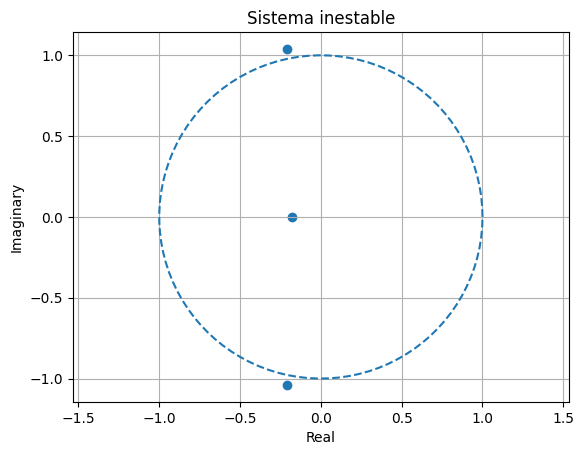

In [19]:
graficar_polos(polos, estabilidad_sistema)

/home/santiago/Documents/ProyectosUniversidad/ProyectoProcesamiento/proyecto_procesamiento/env/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/santiago/Documents/ProyectosUniversidad/ProyectoProcesamiento/proyecto_procesamiento/env/lib/python3.10/site-packages/numpy/ma/core.py:3387: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/home/santiago/Documents/ProyectosUniversidad/ProyectoProcesamiento/proyecto_procesamiento/env/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


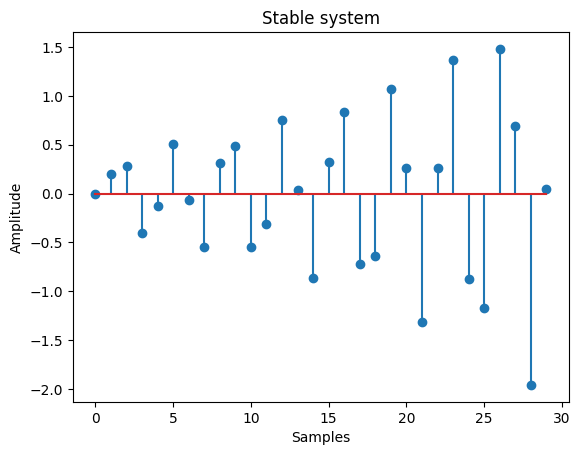

In [31]:
h_iterativo = respuesta_impulso_iterativo(coeficientes_numerador, coeficientes_denominador)
plt.stem(h_iterativo)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('Stable system')
plt.show()

In [33]:
def respuesta_impulso_analitica():
    tiempo_muestreo = numero_datos/frecuencia_muestreo
    dlti=signal.dlti(coeficientes_numerador, coeficientes_denominador, dt=tiempo_muestreo)
    t, y = signal.dimpulse(dlti)
    return t,y

/home/santiago/Documents/ProyectosUniversidad/ProyectoProcesamiento/proyecto_procesamiento/env/lib/python3.10/site-packages/scipy/signal/_ltisys.py:600: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  self.num, self.den = normalize(*system)


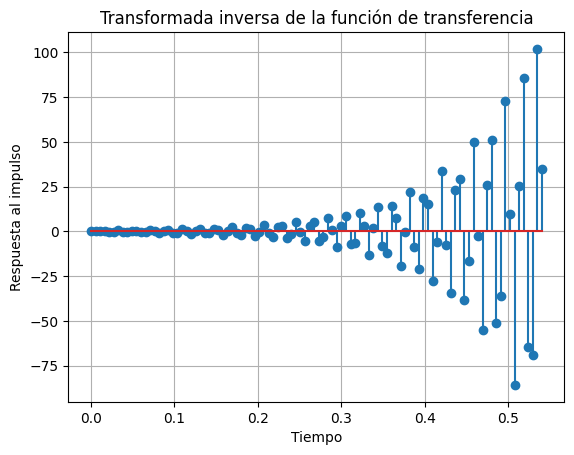

In [34]:
# Graficar la respuesta al impulso
t, h_analitica = respuesta_impulso_analitica()
plt.stem(t, h_analitica[0])
plt.xlabel('Tiempo')
plt.ylabel('Respuesta al impulso')
plt.title('Transformada inversa de la función de transferencia')
plt.grid(True)
plt.show()

In [35]:
def convolution(h):
    n = np.arange(numero_datos)
    u = lambda n: 1*(n >= 0)
    impulso = lambda n: 1*(n == 0)
    if opcion == 1:
        y = np.convolve(u(numero_datos), h, mode='same')
    elif opcion == 2:
        y = np.convolve(impulso(numero_datos), h, mode='same')
    elif opcion == 3:
        y = np.convolve(gamma**n, h, mode='same')
    return y

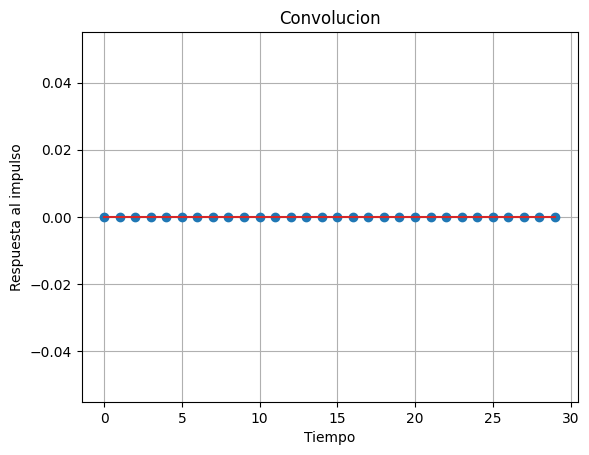

In [42]:
respuesta_estado_cero = convolution(h_iterativo)

plt.stem(respuesta_estado_cero)
plt.xlabel('Tiempo')
plt.ylabel('Respuesta al impulso')
plt.title('Convolucion')
plt.grid(True)
plt.show()